In [2]:
import tensorflow as tf
from tensorflow.keras.metrics import Accuracy, CategoricalAccuracy, TopKCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2, L1
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Activation, GlobalAveragePooling2D, Add, Input
from tensorflow.keras.layers import InputLayer, Rescaling, Conv2D, BatchNormalization, RandomRotation, RandomContrast, RandomFlip, MaxPool2D, Dropout, Flatten, Dense, Resizing, MaxPooling2D
import cv2
from tensorflow.math import confusion_matrix
import seaborn as sns

In [3]:
train_directory = "C:/Users/vampi/Downloads/Emotions Dataset/Emotions Dataset/train"
test_directory = "C:/Users/vampi/Downloads/Emotions Dataset/Emotions Dataset/test"
CLASS_NAMES = ['angry', 'happy', 'sad']
IM_SIZE = 256

In [4]:
# dataset loading
train_dataset = tf.keras.utils.image_dataset_from_directory(train_directory, 
                                                           labels = 'inferred',# inferred so there will be a class(angry) then images
                                                           label_mode = 'categorical',# 0-angry, 010-happy, 001-sad
                                                           class_names = ['angry', 'happy', 'sad'],
                                                           color_mode = 'rgb',
                                                           batch_size = 32,
                                                           image_size = (256,256),
                                                           shuffle = True,
                                                            seed = 12,
                                                           validation_split = 0.2,
                                                           subset='validation'
                                                           )
train_dataset

Found 6799 files belonging to 3 classes.
Using 1359 files for validation.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [5]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test_directory,
                                                          labels='inferred',
                                                          label_mode='categorical',
                                                          class_names=['angry', 'happy', 'sad'],
                                                          color_mode='rgb',
                                                          batch_size=32,
                                                          image_size=(256, 256),
                                                          shuffle=True,
                                                          seed=12,
                                                          )
test_dataset

Found 2205 files belonging to 3 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

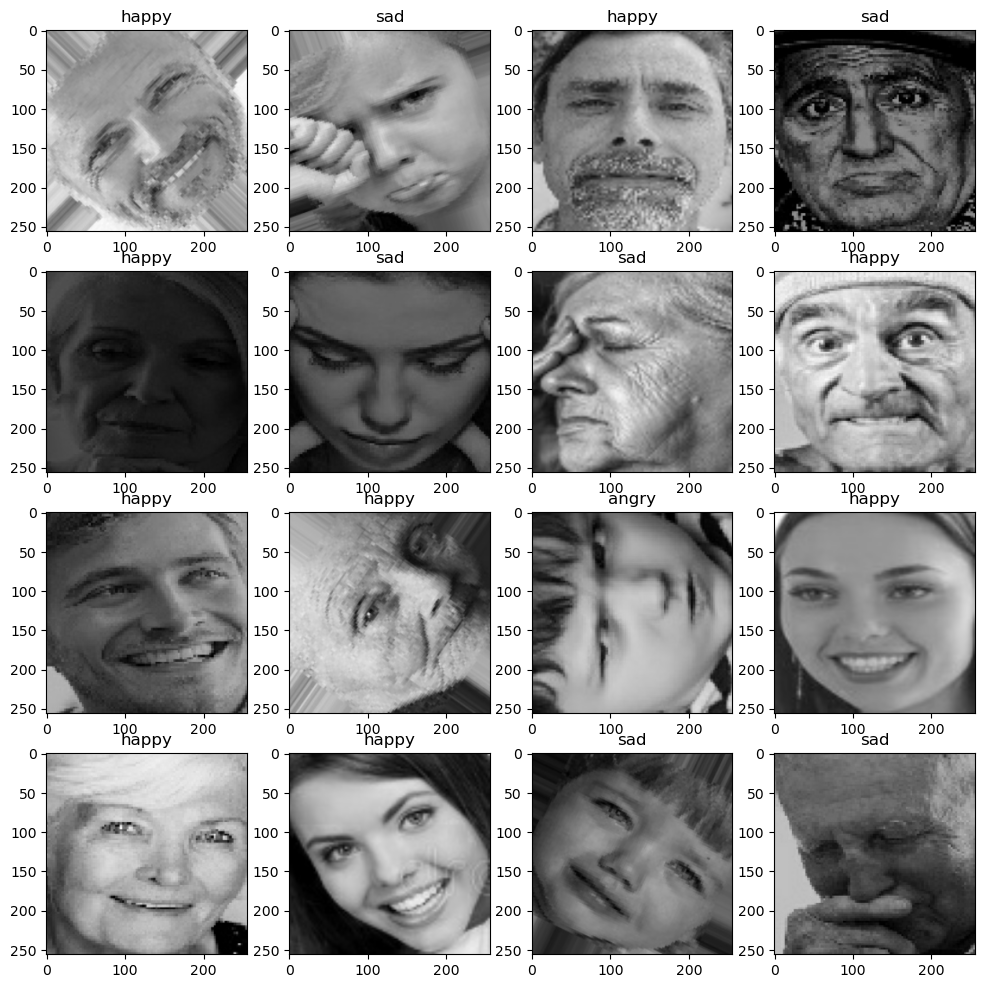

In [6]:
# visualize

plt.figure(figsize = (12, 12))
for images, labels in train_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i]/255.)
        plt.title(CLASS_NAMES[tf.argmax(labels[i]).numpy()])

## Rescale and Resize the data vital part of preprocessing

In [7]:
resize_rescale_data = tf.keras.Sequential([tf.keras.layers.Resizing(IM_SIZE, IM_SIZE),
                                           tf.keras.layers.Rescaling(1/255)])
# now this can easily go to model

## Prefetching of data the final step

In [8]:
training_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)# prefetch pipeline established 

## also resizing and rescaling we do it in the model itself so that we don't have to worry 

## Creating the Model:

In [9]:
 lenet_model = tf.keras.Sequential([
     InputLayer(shape = (256, 256, 3)),
     Resizing(256, 256),
     Rescaling(1./255, name='rescaling'),
     
     Conv2D(filters = 6, kernel_size=3, strides = 1*2, activation='relu', kernel_regularizer=L2(0.0)),
     BatchNormalization(),
     MaxPool2D(pool_size = 2, strides=2),
     Dropout(rate = 0.0),
     
     Conv2D(filters=6*2+4, kernel_size=3, strides = 2, activation='relu', kernel_regularizer=L2(0.0)),
     BatchNormalization(),
     MaxPool2D(pool_size=2, strides=2),
     Flatten(),
     
     Dense(100, activation='relu', kernel_regularizer = L2(0.0)),
     BatchNormalization(),
     Dense(10, activation='relu', kernel_regularizer = L2(0.0)),
     BatchNormalization(),
     
     Dense(3, activation='sigmoid')
 ])

## Training time

In [10]:
loss_function = CategoricalCrossentropy() # if data is not of same dimensions use SparseCategoricalCrossentropy!

In [11]:
metrics = [CategoricalAccuracy(name='accuracy'), TopKCategoricalAccuracy(k=2, name="top_k_accuracy")]

In [12]:
lenet_model.compile(optimizer=Adam(learning_rate=0.001),loss =  loss_function, metrics=metrics)

In [13]:
history = lenet_model.fit(training_dataset, epochs=20, verbose=1)

Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.4590 - loss: 1.2014 - top_k_accuracy: 0.7016
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.6428 - loss: 0.8189 - top_k_accuracy: 0.8611
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.7233 - loss: 0.6591 - top_k_accuracy: 0.9146
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.8062 - loss: 0.5268 - top_k_accuracy: 0.9558
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.8494 - loss: 0.4344 - top_k_accuracy: 0.9715
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.9228 - loss: 0.2885 - top_k_accuracy: 0.9806
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9488 - loss: 0.2294 - top_k_accuracy: 0.9913
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9609 - loss: 0.1882 - top_k_accuracy: 0.9950
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.9586 - loss: 0.1726 - top_k_accuracy: 0.9921
Epoch 10/2

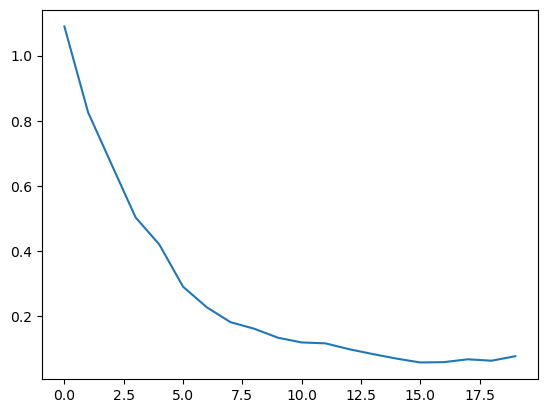

In [14]:
plt.plot(history.history['loss'])

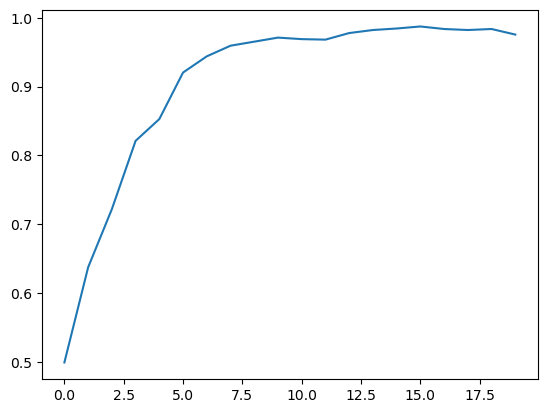

In [15]:
plt.plot(history.history['accuracy'])

In [16]:
# lenet_model.evaluate(validation_dataset) if u do have a validation dataset

In [17]:
test_image = cv2.imread(r"C:\Users\vampi\Downloads\Emotions Dataset\Emotions Dataset\test\happy\98157.jpg")

image_tensor = tf.constant(test_image, dtype = tf.float32)
print(image_tensor.shape)
#but we need a new dimension 4th dimension image so

im = tf.expand_dims(image_tensor, axis=0)
print(lenet_model(im))
print(f'Real label {CLASS_NAMES[tf.argmax(labels[i], axis=0).numpy()]}, Predicted Label {CLASS_NAMES[tf.argmax(lenet_model(im), axis=-1).numpy()[0]]}')

(90, 90, 3)
tf.Tensor([[0.274871   0.7709479  0.95376974]], shape=(1, 3), dtype=float32)
Real label sad, Predicted Label sad


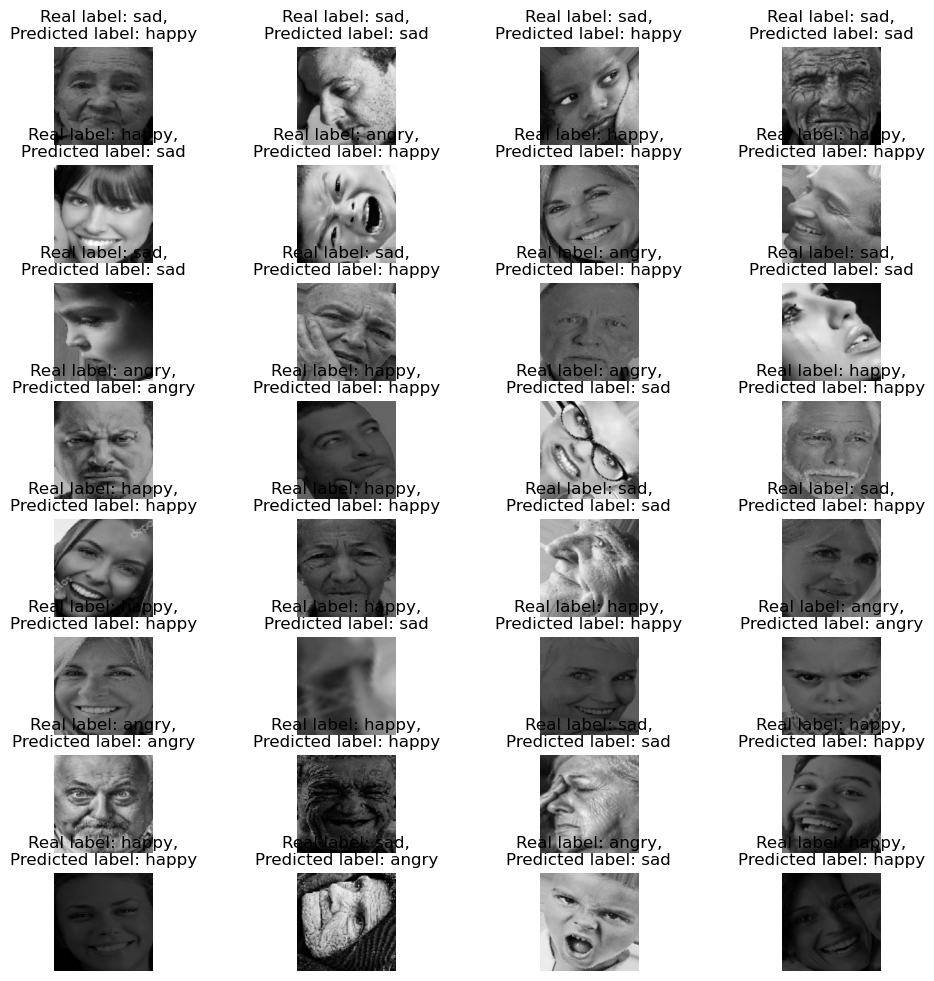

In [18]:
plt.figure(figsize=(12, 12))
for images, labels in test_dataset.take(1):
    for i in range(len(images)):
        ax = plt.subplot(8, 4, i+1)
        plt.imshow(images[i]/255.)
        plt.title(
            f"Real label: {CLASS_NAMES[tf.argmax(labels[i]).numpy()]},\n"
            f"Predicted label: {CLASS_NAMES[tf.argmax(lenet_model(tf.expand_dims(images[i], axis=0)), axis=-1).numpy()[0]]}"
        )
        plt.axis('off')

## How to check confusion matrix

In [19]:
predicted=[]
labels=[]
for im , label in test_dataset:
    predicted.append(lenet_model(im))
    labels.append(label)

### See the difference below

In [20]:
print(tf.argmax(labels[:2], axis=-1))

tf.Tensor(
[[0 2 1 2 1 2 1 2 1 1 0 0 0 2 0 0 0 1 0 1 1 1 0 2 0 2 1 1 2 2 1 1]
 [1 2 1 1 2 1 2 1 1 0 2 1 1 1 0 2 0 0 1 1 2 1 1 2 1 1 2 1 2 1 1 1]], shape=(2, 32), dtype=int64)


In [21]:
print(tf.argmax(labels[:2], axis=-1).numpy())

[[0 2 1 2 1 2 1 2 1 1 0 0 0 2 0 0 0 1 0 1 1 1 0 2 0 2 1 1 2 2 1 1]
 [1 2 1 1 2 1 2 1 1 0 2 1 1 1 0 2 0 0 1 1 2 1 1 2 1 1 2 1 2 1 1 1]]


In [22]:
print(tf.argmax(labels[:2], axis=-1).numpy().flatten())
print(tf.argmax(predicted[:2], axis=-1).numpy().flatten())

[0 2 1 2 1 2 1 2 1 1 0 0 0 2 0 0 0 1 0 1 1 1 0 2 0 2 1 1 2 2 1 1 1 2 1 1 2
 1 2 1 1 0 2 1 1 1 0 2 0 0 1 1 2 1 1 2 1 1 2 1 2 1 1 1]
[1 0 1 0 0 2 0 2 1 1 2 1 1 2 1 1 0 1 0 1 1 1 0 2 0 1 1 1 2 2 1 1 2 2 1 1 2
 1 2 1 1 2 1 1 2 1 0 0 1 2 1 2 2 1 1 2 1 1 2 2 2 2 1 0]


In [23]:
pred = tf.argmax(predicted[:-1], axis=-1).numpy().flatten()
real = tf.argmax(labels[:-1], axis=-1).numpy().flatten()
len(predicted)

69

<Axes: >

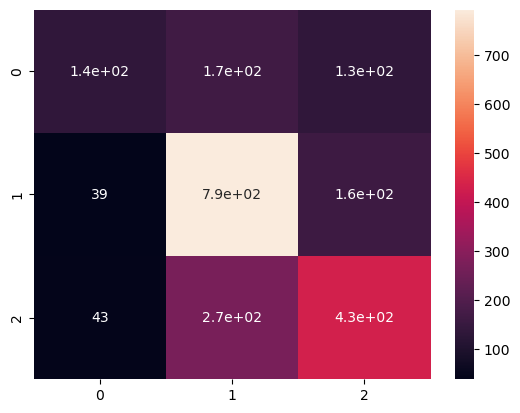

In [24]:
threshold=0.5

cm = confusion_matrix(real, pred)
sns.heatmap(cm, annot=True)

## Time for data augmentation

In [25]:
augment_layers = tf.keras.Sequential([RandomRotation(factor=(-0.025, 0.02501),),# 0.025*360 for the range of rotation allowed to image 
                                     RandomFlip(mode='horizontal',),
                                     RandomContrast(factor=0.1),])

In [26]:
def augment_layer(image, label):
    return augment_layers(image, training=True),label

# You need to do the entire model training and compiling process again after this remember and then do it again

## Dataset Prep

In [27]:
training_dataset = (train_dataset.map(augment_layer, num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE))

## CutMix Data Augmentation

In [28]:
def box(lamda):
    r_x= tf.cast(tfp.distributions.Uniform(0, IM_SIZE).sample(1)[0], dtype=tf.int32)
    r_y= tf.cast(tfp.distributions.Uniform(0, IM_SIZE).sample(1)[0], dtype=tf.int32)

    r_w = tf.cast(IM_SIZE*tf.math.sqrt(1-lamda), dtype=tf.int32)
    r_h = tf.cast(IM_SIZE*tf.math.sqrt(1-lamda), dtype=tf.int32)

    r_x = tf.clip_by_value(r_x-r_w//2, 0, IM_SIZE)
    r_y = tf.clip_by_value(r_x-r_w//2, 0, IM_SIZE)

    x_b_r = tf.clip_by_value(r_x+r_w//2, 0, IM_SIZE)
    y_b_r = tf.clip_by_value(r_x+r_w//2, 0, IM_SIZE)

    r_w = x_b_r-r_x

    if(r_w==0):
        r_w=1
    r_h = y_b_r-r_y
    if(r_h==0):
        r_h=1
    return r_y,r_x,r_h,r_w

In [29]:
def cutmix(dataset_1, dataset_2):
    image_1,label_1 = train_dataset_1
    image_2, label_2=train_dataset_2
    lamda = tfp.distributions.Beta(0.2,0.2)
    lamda = lamda.sample(1)[0]
    
    r_y,r_x,r_h,r_w = box(lamda)
    crop_2=tf.image.crop_to_bounding_box(image_2, r_y, r_x, r_h, r_w)
    pad_2 = tf.image.pad_to_bounding_box(crop_2, r_y, r_x, IM_SIZE, IM_SIZE)
    
    crop_1=tf.image.crop_to_bounding_box(image_1, r_y, r_x, r_h, r_w)
    pad_1 = tf.image.pad_to_bounding_box(crop_1, r_y, r_x, IM_SIZE, IM_SIZE)
    
    image = image_1 - pad_1 + pad_2
    
    lamda = tf.cast(1-(r_w*r_h)/(IM_SIZE*IM_SIZE), dtype=tf.float32)
    label = lamda*tf.cast(label_1, dtype=tf.float32)+(1-lamda)*tf.cast(label_2, dtype=tf.float32)
    return image, label

In [30]:
train_dataset_1 = train_dataset.map(augment_layer, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset_2 = train_dataset.map(augment_layer, num_parallel_calls=tf.data.AUTOTUNE)

mixed_dataset = tf.data.Dataset.zip((train_dataset_1, train_dataset_2))

In [31]:
#training_dataset = (mixed_dataset.map(cutmix, num_parallel_calls= tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE))

## Tf Records for pipelining

In [32]:
from tensorflow.train import BytesList, FloatList, Int64List, Example, Features, Feature

In [33]:
training_dataset = (training_dataset.unbatch())

In [34]:
def create_example(image, label):
    
    bytes_feature = Feature(bytes_list = BytesList(value=[image]))
    int_feature = Feature(int64_list=Int64List(value=[label]))
    
    example = Example(features=Features(feature={'images':bytes_feature,
                                                'labels':int_feature}))
    
    return example.SerializeToString()

In [35]:
shards =10
PATH = r'C:\Users\vampi\Downloads\Emotions Dataset\Emotions Dataset\tfrecords'

In [36]:
def encode_image(image, label):
    image=tf.image.convert_image_dtype(image, dtype=tf.uint8)
    image = tf.io.encode_jpeg(image)
    return image, tf.argmax(label)

In [37]:
encoded_dataset = (training_dataset.map(encode_image))

In [38]:
for shard_number in range(shards):
    
    sharded_dataset= (encoded_dataset.shard(shards, shard_number).as_numpy_iterator())
    
    with tf.io.TFRecordWriter(PATH.format(shard_number)) as file_writer:
        for encoded_image, encoded_label in sharded_dataset:
            example = create_example(encoded_image, encoded_label)
            file_writer.write(example)           

## Convert into tensorflow dataset back

In [39]:
reconstructed_dataset = tf.data.TFRecordDataset(filenames=[])

In [40]:
l=[PATH.format(p) for p in range(shards)]
print(l)

['C:\\Users\\vampi\\Downloads\\Emotions Dataset\\Emotions Dataset\\tfrecords', 'C:\\Users\\vampi\\Downloads\\Emotions Dataset\\Emotions Dataset\\tfrecords', 'C:\\Users\\vampi\\Downloads\\Emotions Dataset\\Emotions Dataset\\tfrecords', 'C:\\Users\\vampi\\Downloads\\Emotions Dataset\\Emotions Dataset\\tfrecords', 'C:\\Users\\vampi\\Downloads\\Emotions Dataset\\Emotions Dataset\\tfrecords', 'C:\\Users\\vampi\\Downloads\\Emotions Dataset\\Emotions Dataset\\tfrecords', 'C:\\Users\\vampi\\Downloads\\Emotions Dataset\\Emotions Dataset\\tfrecords', 'C:\\Users\\vampi\\Downloads\\Emotions Dataset\\Emotions Dataset\\tfrecords', 'C:\\Users\\vampi\\Downloads\\Emotions Dataset\\Emotions Dataset\\tfrecords', 'C:\\Users\\vampi\\Downloads\\Emotions Dataset\\Emotions Dataset\\tfrecords']


In [41]:
def parse_tfrecords(example):
    
    feature_description={"images": tf.io.FixedLenFeature([],tf.string),
                        "labels":tf.io.FixedLenFeature([], tf.int64)}
    
    example = tf.io.parse_single_example(example, feature_description)
    example['images'] = tf.io.decode_jpeg(example['images'], channels=3)
    return example['images'], example['labels']

## now use these shards to train model but use SPARSEcategoricalentropy

# Now let us make the best CNN ResNet!!

In [42]:
class CustomConv2D(tf.keras.layers.Layer):
    def __init__(self, n_filters, kernel_size, n_strides, padding='valid'):
        super(CustomConv2D, self).__init__(name='custom_conv2d')
        
        self.conv = Conv2D(filters = n_filters, kernel_size=kernel_size, activation='relu', strides=n_strides, padding=padding)
        self.batch_norm = BatchNormalization()
        
    def call(self, x, training=True):
        x=self.conv(x)
        x=self.batch_norm(x)
        
        return x

## Residual Block

In [43]:
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, n_channels, n_strides  =1):
        super(ResidualBlock, self).__init__(name='res_block')
        
        self.dotted=(n_strides!=1)
        self.custom_conv_1 =  CustomConv2D(n_channels, 3, n_strides, padding='same')
        self.custom_conv_2 =  CustomConv2D(n_channels, 3, 1, padding='same')
        self.activation = Activation('relu')
        
        if self.dotted:
            self.custom_conv_3 = CustomConv2D(n_channels, 1, n_strides)
    def call(self, input):
        x=self.custom_conv_1(input)
        x = self.custom_conv_2(x)
        if self.dotted:# dotted layer hua toh result add kro vrna sirf input add kro
            x_add = self.custom_conv_3(input)
            x_add = Add()([x, x_add])
        else:# sirf input add hua
            x_add = Add()([x, input])
        return self.activation(x_add)

In [44]:
class ResNet34(tf.keras.Model):
    def __init__(self,):
        super(ResNet34, self).__init__(name='resnet34')
        
        self.conv1 = CustomConv2D(64, 7, 2, padding='same')
        self.maxpool = MaxPooling2D(3, 2)
        
        self.conv_2_1 = ResidualBlock(64)
        self.conv_2_2 = ResidualBlock(64)
        self.conv_2_3 = ResidualBlock(64)
        
        self.conv_3_1 = ResidualBlock(128, 2)
        self.conv_3_2 = ResidualBlock(128)
        self.conv_3_3 = ResidualBlock(128)
        self.conv_3_4 = ResidualBlock(128)
        
        self.conv_4_1 = ResidualBlock(256, 2)
        self.conv_4_2 = ResidualBlock(256)
        self.conv_4_3 = ResidualBlock(256)
        self.conv_4_4 = ResidualBlock(256)
        self.conv_4_5 = ResidualBlock(256)
        self.conv_4_6 = ResidualBlock(256)
        
        self.conv_5_1 = ResidualBlock(512, 2)
        self.conv_5_2 = ResidualBlock(512)
        self.conv_5_3 = ResidualBlock(512)
        
        self.global_pool = GlobalAveragePooling2D()
        self.fc3 = Dense(3, activation='softmax')
    def call(self, x):
        x = self.conv1(x)
        x = self.maxpool(x)
        
        x = self.conv_2_1(x)
        x = self.conv_2_2(x)
        x = self.conv_2_3(x)
        
        x = self.conv_3_1(x)
        x = self.conv_3_2(x)
        x = self.conv_3_3(x)
        x = self.conv_3_4(x)
        
        x = self.conv_4_1(x)
        x = self.conv_4_2(x)
        x = self.conv_4_3(x)
        x = self.conv_4_4(x)
        x = self.conv_4_5(x)
        x = self.conv_4_6(x)
        
        x = self.conv_5_1(x)
        x = self.conv_5_2(x)
        x = self.conv_5_3(x)
        
        x=self.global_pool(x)
        
        return self.fc3(x)

In [45]:
resnet = ResNet34()
resnet(tf.zeros([1, 256, 256, 3]))
resnet.summary()

Model: "resnet34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ custom_conv2d (CustomConv2D)         │ ?                           │           9,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (1, 63, 63, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │          74,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │          74,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │          74,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │         231,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │         296,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │         296,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │         296,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │         921,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │       1,182,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │       1,182,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │       1,182,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │       1,182,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │       1,182,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │       3,677,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │       4,723,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ res_block (ResidualBlock)            │ ?                           │       4,723,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (1, 512)                    │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (1, 3)                      │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,311,747 (81.30 MB)

 Trainable params: 21,294,723 (81.23 MB)

 Non-trainable params: 17,024 (66.50 KB)

## Model training

In [46]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback=ModelCheckpoint('weights.{epoch:02d}-{val_accuracy:.2f}.keras',
                                  monitor='val_accuracy', verbose=1, save_best_only=True)

In [47]:
loss_function = CategoricalCrossentropy()

In [48]:
metrics = [CategoricalAccuracy(name="accuracy"), TopKCategoricalAccuracy(k=2, name='top-k-accuracy')]

In [49]:
#train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [50]:
resnet.compile(optimizer=Adam(learning_rate=0.05),
              loss=loss_function,
              metrics = metrics)

In [51]:
# history = resnet.fit(train_dataset, epochs=60, verbose=1) #callbacks=[checkpoint_callback])#use callbacks only when u have ur validation dataset too

## Transfer learning let us go

In [52]:
backbone = tf.keras.applications.efficientnet.EfficientNetB4(include_top = False, weights='imagenet',classes=1000, classifier_activation='softmax')

In [53]:
backbone.trainable = False #so it is freezed now no training can occur

In [54]:
model = tf.keras.Sequential([Input(shape=(256, 256, 3)),
                            backbone,
                            GlobalAveragePooling2D(),
                            Dense(1024, activation='relu'),#1024 is the number of dense layers 
                            BatchNormalization(),
                            Dense(128, activation='relu'),
                            Dense(3, activation='softmax')
                            ])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)          │ (None, 8, 8, 1792)          │      17,673,823 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1792)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       1,836,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,645,538 (74.94 MB)

 Trainable params: 1,969,667 (7.51 MB)

 Non-trainable params: 17,675,871 (67.43 MB)

In [55]:
loss_function = CategoricalCrossentropy()
metrics = [CategoricalAccuracy(name="accuracy"), TopKCategoricalAccuracy(k=2, name='top-k-accuracy')]

In [56]:
model.compile(optimizer=Adam(learning_rate=0.001), loss=loss_function, metrics=metrics)

In [57]:
history = model.fit(train_dataset, epochs=2, verbose=1)

Epoch 1/2
43/43 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.5691 - loss: 1.2914 - top-k-accuracy: 0.8515
Epoch 2/2
43/43 ━━━━━━━━━━━━━━━━━━━━ 110s 3s/step - accuracy: 0.7490 - loss: 0.6300 - top-k-accuracy: 0.9429


In [58]:
# also after getting best weights u can just do model.load_weights('best_weights')

In [59]:
test_image = cv2.imread(r"C:\Users\vampi\Downloads\Emotions Dataset\Emotions Dataset\test\happy\98157.jpg")

image_tensor = tf.constant(test_image, dtype = tf.float32)
print(image_tensor.shape)
#but we need a new dimension 4th dimension image so

im = tf.expand_dims(image_tensor, axis=0)
print(lenet_model(im))

(90, 90, 3)
tf.Tensor([[0.274871   0.7709479  0.95376974]], shape=(1, 3), dtype=float32)


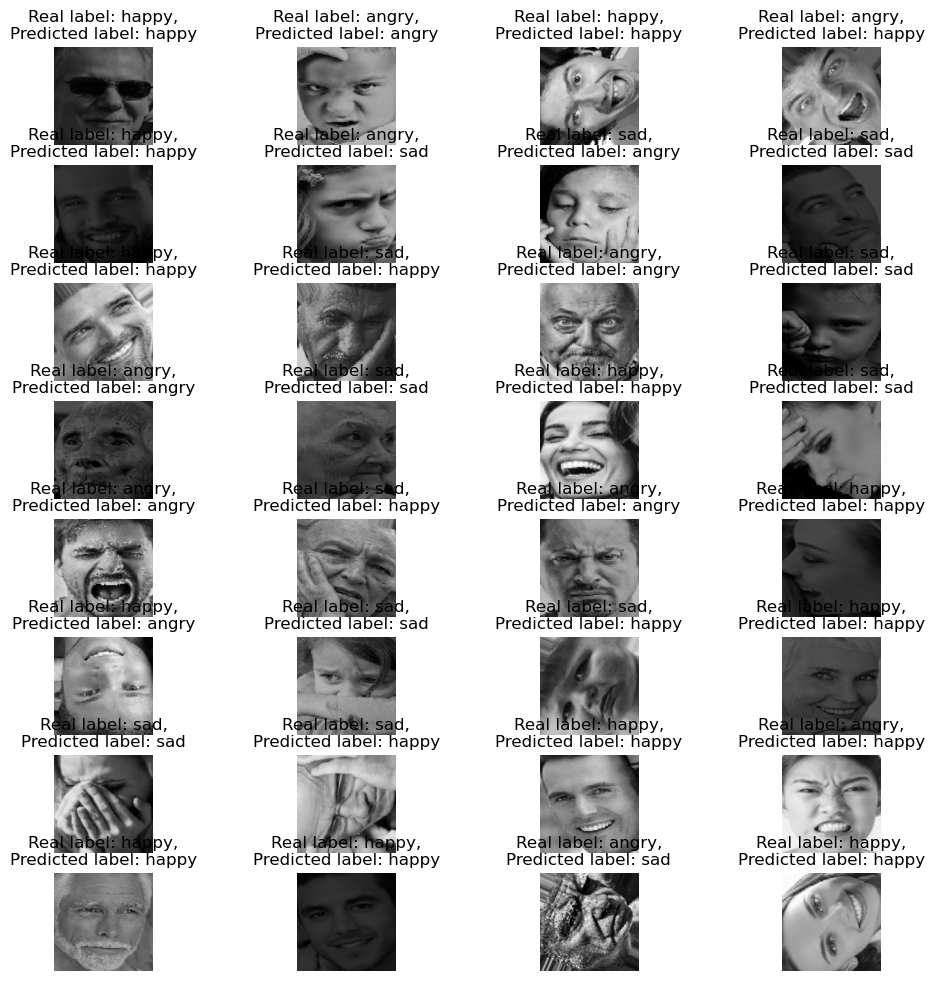

In [60]:
plt.figure(figsize=(12, 12))
for images, labels in test_dataset.take(1):
    for i in range(len(images)):
        ax = plt.subplot(8, 4, i+1)
        plt.imshow(images[i]/255.)
        plt.title(
            f"Real label: {CLASS_NAMES[tf.argmax(labels[i]).numpy()]},\n"
            f"Predicted label: {CLASS_NAMES[tf.argmax(lenet_model(tf.expand_dims(images[i], axis=0)), axis=-1).numpy()[0]]}"
        )
        plt.axis('off')

<Axes: >

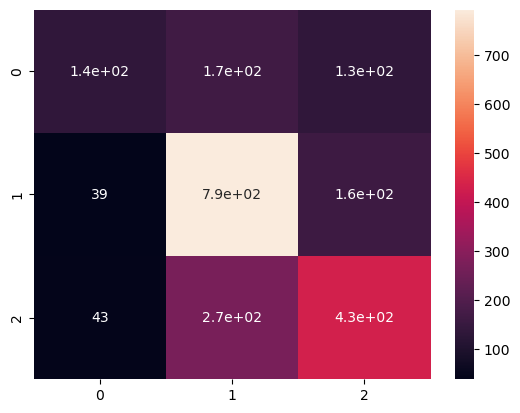

In [61]:
threshold=0.5

cm = confusion_matrix(real, pred)
sns.heatmap(cm, annot=True)

## Fine tuning the model

In [62]:
backbone.trainable = True # now the transfer learning model can be used 

In [63]:
from tensorflow.keras.models import Model
input  = Input(shape=(256, 256, 3))

x=backbone(input, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(100, activation='relu')(x)
x=BatchNormalization()(x)
x = Dense(10, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

finetuned_model = Model(input , output)

In [64]:
finetuned_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb4 (Functional)          │ (None, 8, 8, 1792)          │      17,673,823 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1792)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │         179,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,854,566 (68.11 MB)

 Trainable params: 17,729,159 (67.63 MB)

 Non-trainable params: 125,407 (489.88 KB)

In [65]:
finetuned_model.compile(optimizer=Adam(learning_rate=0.1/100),# keep learning rate very slow when modifying the fine tuned model
                       loss=loss_function,
                       metrics=['accuracy'])

In [67]:
#history = finetuned_model.fit(train_dataset, epochs=20, verbose=1)# fine tuned model breaks CPU

## Vgg Net for blackbox visualization

In [80]:
def is_conv(layer_name):
    if 'conv' in layer_name:
        return True
    else:
        return False

In [81]:
vgg_backbone = tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(256, 256, 3))

In [82]:
feature_map = [layer.output for layer in vgg_backbone.layers[1:] if is_conv(layer.name)]

In [83]:
feature_map_model = Model(inputs=vgg_backbone.input,
                         outputs = feature_map)
feature_map_model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
test_image = cv2.imread(r"C:\Users\vampi\Downloads\Emotions Dataset\Emotions Dataset\test\happy\98157.jpg")
test_image = cv2.resize(test_image, (256, 256))
image_tensor = tf.constant(test_image, dtype = tf.float32)
#but we need a new dimension 4th dimension image so

im = tf.expand_dims(image_tensor, axis=0)
f_maps = feature_map_model.predict(im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step


In [88]:
for i in range(len(f_maps)):
    print(f_maps[i].shape)
print(len(f_maps))

(1, 256, 256, 64)
(1, 256, 256, 64)
(1, 128, 128, 128)
(1, 128, 128, 128)
(1, 64, 64, 256)
(1, 64, 64, 256)
(1, 64, 64, 256)
(1, 32, 32, 512)
(1, 32, 32, 512)
(1, 32, 32, 512)
(1, 16, 16, 512)
(1, 16, 16, 512)
(1, 16, 16, 512)
13


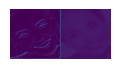

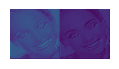

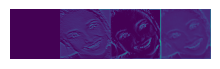

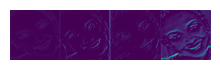

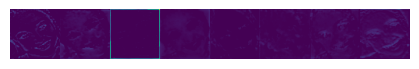

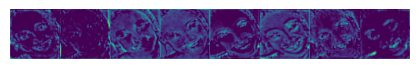

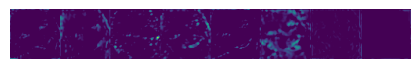

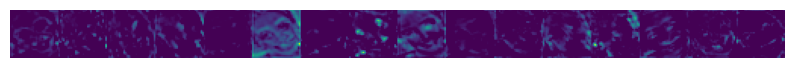

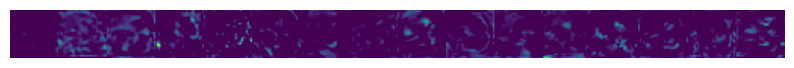

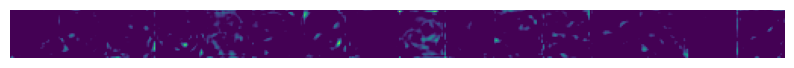

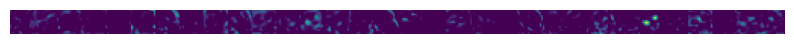

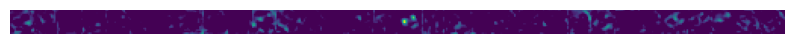

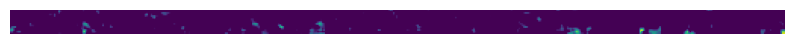

In [93]:
import numpy as np
for i in range(len(f_maps)):
    plt.figure(figsize=(10, 10))# extremely small size for less usage of memory
    f_size=f_maps[i].shape[1]
    n_channels=f_maps[i].shape[3]
    joint_maps = np.ones((f_size, f_size*n_channels))
    
    axs = plt.subplot(len(f_maps), 1, i+1)
    for j in range(n_channels):
        joint_maps[:, f_size*j:f_size*(j+1)] = f_maps[i][..., j]
        
    plt.imshow(joint_maps[:, 0:512])
    plt.axis("off")

In [1]:
pwd

'C:\\Users\\vampi'